In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

In [36]:
classes = [0, 1, 2]
imgs_dir = "/mnt/secssd/SSDA_Annot_WSI_strage/mnt2/MF0003/"

csv_path = './MF0003_cluster_entropy_num.csv'
df = pd.read_csv(csv_path, index_col=0)
df

,wsi,entropy,sample_num
0,03_G144,3.0519,696
1,03_G34,2.9646,653
2,03_G139-1,2.7312,1306
3,03_G170,2.7271,361
4,03_G180,2.6927,1047
...,...,...,...
103,03_G204,1.3633,141
104,03_G176,1.2097,114
105,03_G58,0.6436,244
106,03_G51,0.5552,196


In [37]:
def get_files(wsi_name: str, classes: list, imgs_dir: str):
    def get_sub_classes(classes):
        # classesからsub-classを取得
        sub_cl_list = []
        for idx in range(len(classes)):
            cl = classes[idx]
            if isinstance(cl, list):
                for sub_cl in cl:
                    sub_cl_list.append(sub_cl)
            else:
                sub_cl_list.append(cl)
        return sub_cl_list

    re_pattern = re.compile("|".join([f"/{i}/" for i in get_sub_classes(classes)]))

    files_list = []
    files_list.extend(
        [
            p
            for p in glob.glob(imgs_dir + f"*/{wsi_name}_*/*.png", recursive=True)
            if bool(re_pattern.search(p))
        ]
    )
    return files_list


def get_class_num(files: list, classes: list):
    result_dict = {}
    for cls in classes:
        result_dict[cls] = 0

    for file_path in files:
        for cls in classes:
            if f'/{cls}/' in file_path:
                result_dict[cls] += 1
    return result_dict

In [38]:
flist = get_files('03_G144', classes=classes, imgs_dir=imgs_dir)
print(len(flist))

result = get_class_num(flist, classes=classes)
result

696


{0: 596, 1: 70, 2: 30}

In [70]:
wsis = df['wsi'].tolist()

class_num_dict = {'wsi': []}
for cls in classes:
    class_num_dict[f"class_{cls}"] = []
class_num_dict['total_class'] = []

for wsi in wsis:
    class_num_dict['wsi'].append(wsi)
    
    flist = get_files(wsi, classes=classes, imgs_dir=imgs_dir)
    result = get_class_num(flist, classes=classes)
    
    total_class = 0
    for cls in classes:
        class_num_dict[f"class_{cls}"].append(result[cls])
        if result[cls] > 0:
            total_class += 1
    class_num_dict['total_class'].append(total_class)

output_df = pd.DataFrame(class_num_dict)
output_df

merged_df = pd.merge(df, output_df)
merged_df.to_csv('MF0003_cluster_entropy_all.csv')
merged_df

,wsi,entropy,sample_num,class_0,class_1,class_2,total_class
0,03_G144,3.0519,696,596,70,30,3
1,03_G34,2.9646,653,608,45,0,2
2,03_G139-1,2.7312,1306,1244,62,0,2
3,03_G170,2.7271,361,319,24,18,3
4,03_G180,2.6927,1047,932,115,0,2
...,...,...,...,...,...,...,...
103,03_G204,1.3633,141,118,0,23,2
104,03_G176,1.2097,114,105,0,9,2
105,03_G58,0.6436,244,2,242,0,2
106,03_G51,0.5552,196,187,9,0,2


     rank        wsi  entropy  sample_num  class_0  class_1  class_2  \
0     108  03_G109-1   0.5047         269        4      265        0   
1     107     03_G51   0.5552         196      187        9        0   
2     106     03_G58   0.6436         244        2      242        0   
3     105    03_G176   1.2097         114      105        0        9   
4     104    03_G204   1.3633         141      118        0       23   
..    ...        ...      ...         ...      ...      ...      ...   
103     5    03_G180   2.6927        1047      932      115        0   
104     4    03_G170   2.7271         361      319       24       18   
105     3  03_G139-1   2.7312        1306     1244       62        0   
106     2     03_G34   2.9646         653      608       45        0   
107     1    03_G144   3.0519         696      596       70       30   

     total_class  
0              2  
1              2  
2              2  
3              2  
4              2  
..           ...  
10

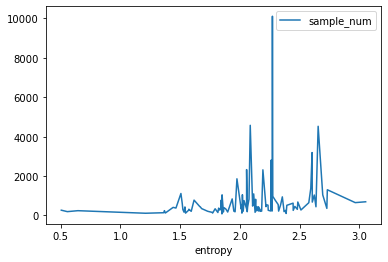

In [74]:
import numpy as np
merged_df_s = merged_df.sort_values('entropy', ascending=True).reset_index()
merged_df_s = merged_df_s.rename(columns={'index': 'rank'})
merged_df_s['rank'] += 1
print(merged_df_s)
# merged_df_s.plot.bar(x='rank', y='sample_num')
# merged_df_s.plot(x='rank', y='sample_num')
merged_df_s.plot(x='entropy', y='sample_num')
# merged_df_s.plot(x='entropy', y='total_class')
plt.show()

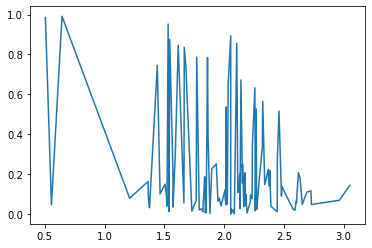

In [79]:
a = (merged_df_s['class_1'] + merged_df_s['class_2']) / merged_df_s['sample_num']
a
plt.plot(merged_df_s['entropy'], a)
plt.show()